In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [ ]:
train = pd.read_csv("/content/fraudTest.csv")
test = pd.read_csv("/content/fraudTest.csv")

data = pd.concat([train,test])
data.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,38932.000000,3.893200e+04,38932.000000,38930.000000,38930.000000,38930.000000,3.893000e+04,3.893000e+04,38930.000000,38930.000000,38930.000000
mean,9732.500000,4.180289e+17,68.799466,48491.198921,38.528486,-90.049245,9.049912e+04,1.372076e+09,38.521391,-90.049769,0.003493
std,5619.422333,1.310821e+18,139.377233,26813.529216,5.092264,13.625690,3.093202e+05,1.759417e+05,5.130625,13.635263,0.059003
min,0.000000,6.041621e+10,1.000000,1257.000000,20.027100,-165.672300,2.300000e+01,1.371817e+09,19.163455,-166.464422,0.000000
25%,4866.000000,1.800482e+14,9.480000,25526.000000,34.620500,-96.701000,7.600000e+02,1.371924e+09,34.714781,-96.739825,0.000000
50%,9732.500000,3.520550e+15,46.135000,48043.000000,39.371600,-87.366700,2.470000e+03,1.372027e+09,39.388556,-87.322759,0.000000
75%,14599.000000,4.634956e+15,81.780000,72011.000000,42.015800,-80.128400,2.047800e+04,1.372235e+09,41.997075,-80.161030,0.000000
max,19465.000000,4.992346e+18,6600.440000,99783.000000,65.689900,-67.950300,2.906700e+06,1.372405e+09,66.669356,-66.955602,1.000000


In [ ]:
print(train.shape)
print(test.shape)

(19466, 23)
(19466, 23)


In [ ]:
display(data.head())
print(data.describe())
print(data.isnull().sum())

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497.0,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1.371817e+09,33.986391,-81.200714,0.0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302.0,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1.371817e+09,39.450498,-109.960431,0.0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496.0,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1.371817e+09,40.495810,-74.196111,0.0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767.0,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1.371817e+09,28.812398,-80.883061,0.0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126.0,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1.371817e+09,44.959148,-85.884734,0.0


         Unnamed: 0        cc_num           amt           zip           lat  \
count  38932.000000  3.893200e+04  38932.000000  38930.000000  38930.000000   
mean    9732.500000  4.180289e+17     68.799466  48491.198921     38.528486   
std     5619.422333  1.310821e+18    139.377233  26813.529216      5.092264   
min        0.000000  6.041621e+10      1.000000   1257.000000     20.027100   
25%     4866.000000  1.800482e+14      9.480000  25526.000000     34.620500   
50%     9732.500000  3.520550e+15     46.135000  48043.000000     39.371600   
75%    14599.000000  4.634956e+15     81.780000  72011.000000     42.015800   
max    19465.000000  4.992346e+18   6600.440000  99783.000000     65.689900   

               long      city_pop     unix_time     merch_lat    merch_long  \
count  38930.000000  3.893000e+04  3.893000e+04  38930.000000  38930.000000   
mean     -90.049245  9.049912e+04  1.372076e+09     38.521391    -90.049769   
std       13.625690  3.093202e+05  1.759417e+05    

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19466 entries, 0 to 19465
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             19466 non-null  int64  
 1   trans_date_trans_time  19466 non-null  object 
 2   cc_num                 19466 non-null  int64  
 3   merchant               19466 non-null  object 
 4   category               19466 non-null  object 
 5   amt                    19466 non-null  float64
 6   first                  19466 non-null  object 
 7   last                   19466 non-null  object 
 8   gender                 19466 non-null  object 
 9   street                 19466 non-null  object 
 10  city                   19465 non-null  object 
 11  state                  19465 non-null  object 
 12  zip                    19465 non-null  float64
 13  lat                    19465 non-null  float64
 14  long                   19465 non-null  float64
 15  ci

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19466 entries, 0 to 19465
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             19466 non-null  int64  
 1   trans_date_trans_time  19466 non-null  object 
 2   cc_num                 19466 non-null  int64  
 3   merchant               19466 non-null  object 
 4   category               19466 non-null  object 
 5   amt                    19466 non-null  float64
 6   first                  19466 non-null  object 
 7   last                   19466 non-null  object 
 8   gender                 19466 non-null  object 
 9   street                 19466 non-null  object 
 10  city                   19465 non-null  object 
 11  state                  19465 non-null  object 
 12  zip                    19465 non-null  float64
 13  lat                    19465 non-null  float64
 14  long                   19465 non-null  float64
 15  ci

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoders = {}
label_encode_cols = ['merchant','category','gender','state','job']
for col in label_encode_cols:
  le=LabelEncoder()
  data[col]=le.fit_transform(data[col])
  label_encoders[col]=le
  train[col]=le.fit_transform(train[col])
  label_encoders[col]=le
  test[col]=le.fit_transform(test[col])
  label_encoders[col]=le


In [ ]:
data['trans_date_trans_time']=pd.to_datetime(data['trans_date_trans_time'])
data['dob']=pd.to_datetime(data['dob'])

data['transaction_year']=data['trans_date_trans_time'].dt.year
data['transaction_month']=data['trans_date_trans_time'].dt.month
data['transaction_day']=data['trans_date_trans_time'].dt.day
data['transaction_hour']=data['trans_date_trans_time'].dt.hour

data('birth_year')==data['dob'].dt.year
data('birth_month')=data['dob'].dt.month
data('birth_day')=data['dob'].dt.day
data.drop(['trans_date_trans_time','dob'],axis=1,inplace=True)

train['trans_date_trans_time']=pd.to_datetime(train['trans_date_trans_time'])
train['dob']=pd.to_datetime(data['dob'])

train['transaction_year']=train['trans_date_trans_time'].dt.year
train['transaction_month']=train['trans_date_trans_time'].dt.month
train['transaction_day']=train['trans_date_trans_time'].dt.day
train['transaction_hour']=train['trans_date_trans_time'].dt.hour

train('birth_year')=train['dob'].dt.year
train('birth_month')=train['dob'].dt.month
train('birth_day')=train['dob'].dt.day
train.drop(['trans_date_trans_time','dob'],axis=1,inplace=True)


test['trans_date_trans_time']=pd.to_datetime(test['trans_date_trans_time'])
test['dob']=pd.to_datetime(test['dob'])

test['transaction_year']=test['trans_date_trans_time'].dt.year
test['transaction_month']=test['trans_date_trans_time'].dt.month
test['transaction_day']=test['trans_date_trans_time'].dt.day
test['transaction_hour']=test['trans_date_trans_time'].dt.hour

test('birth_year')=test['dob'].dt.year
test('birth_month')=test['dob'].dt.month
test('birth_day')=test['dob'].dt.day
test.drop(['trans_date_trans_time','dob'],axis=1,inplace=True)


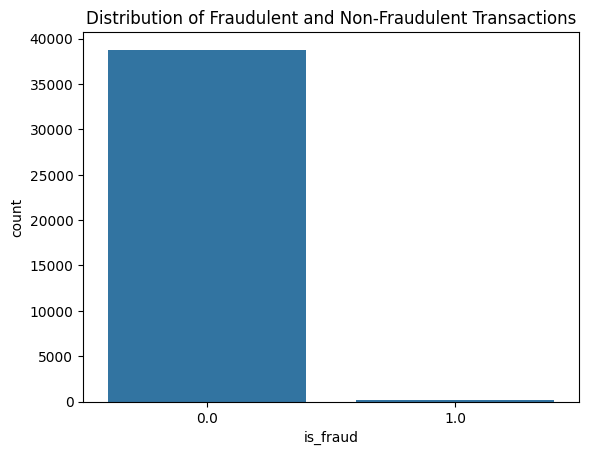

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(data=data, x='is_fraud')
plt.title('Distribution of Fraudulent and Non-Fraudulent Transactions')
plt.show()

In [ ]:
print(data.index.duplicated().sum())
data=data.reset_index(drop=True)
print(data.index.duplicated().sum())

19466
0


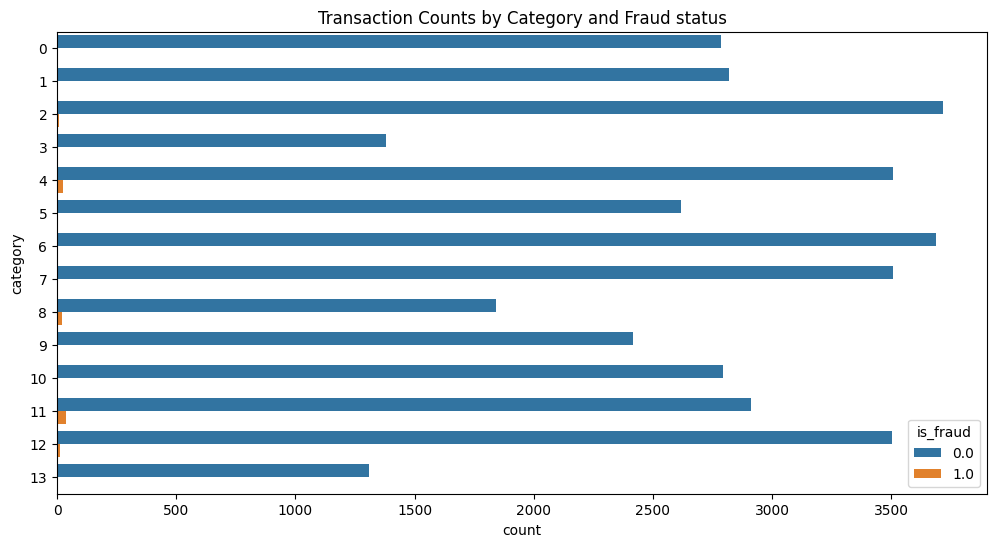

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(data=data,y='category',hue='is_fraud')
plt.title('Transaction Counts by Category and Fraud status')
plt.xticks(rotation=0)
plt.show()

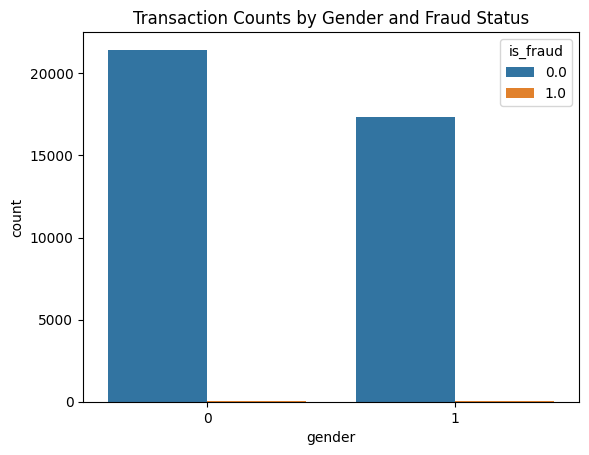

In [ ]:
## The 0 represent as Male and 1 represent as Female
sns.countplot(data=data,x='gender',hue='is_fraud')
plt.title('Transaction Counts by Gender and Fraud Status')
plt.show()

In [ ]:
sns.heatmap(data=data,annot=True,cmap='red')
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
x=data.drop('is_fraud',axis=1)
y=data['is_fraud']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)


In [ ]:
## Training The Model For Logistics Regression
log_model=LogisticRegression(max_iter=1000)
log_model.fit(x_train,y_train)
y_pred=log_model.predict(x_test)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print("Accuracy:",accuracy_score(y_test,y_pred))

In [ ]:
tree_model=DecisionTreeClassifier()
tree_model.fit(x_train,y_train)
y_pred=tree_model.predict(x_test)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print("Accuracy:",accuracy_score(y_test,y_pred))
